# Importing dependancies

In [9]:
import numpy as np   #for calculation
import pandas as pd  #for managing the 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #for training and testing the data
from sklearn.linear_model import LogisticRegression #for model training with the data
from sklearn.metrics import accuracy_score  #for checking the accuracy of the result that we have
from sklearn.preprocessing import StandardScaler


# Data collection and processing

In [10]:
#loading csv data to pandas dataframe
heart_data = pd.read_csv('heart_disease.csv')

In [13]:
heart_data #Displaying the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:

#checking the number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [14]:
#check for missing value
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
#statistical measures
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
#checking the distribution of target variable
heart_data['target'].value_counts() 

target
1    165
0    138
Name: count, dtype: int64

In [17]:

X = heart_data.drop(columns = 'target', axis=1)
Y = heart_data['target']

In [18]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [19]:
print (Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [21]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify= Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# Model training Logistic Regression

In [23]:
model = LogisticRegression()

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Training the Logistic Regression model with scaled data
model = LogisticRegression(max_iter=2000)  # Increased max_iter to 2000
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=2000)

In [26]:
#training logistic regresesion with training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

# Model evaluation and Regression

In [27]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print(f"accuracy on training data is : {training_data_accuracy}")

accuracy on training data is : 0.8553719008264463


In [29]:
print(f"accuracy on training data is : {training_data_accuracy}")

accuracy on training data is : 0.8553719008264463


# Building a predictive system that takes a single input

In [43]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#change the input data to a numpy array
input_data_as_numpy = np.asarray(input_data)

#reshape numpy array as we are predicting for only one dataset
data_reshaped = input_data_as_numpy.reshape(1, -1)

prediction = model.predict(data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


[0]
The Person does not have a Heart Disease


E:\anaconda3\NewAnaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


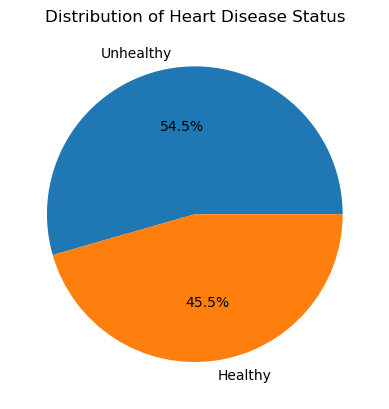

In [44]:
import matplotlib.pyplot as plt

# Sample data (assuming you have counts of unhealthy and healthy people)
unhealthy = 165
healthy = 138

# Create a list of labels
labels = ['Unhealthy', 'Healthy']

# Create a list of data values
data = [unhealthy, healthy]

# Create a pie chart
plt.pie(data, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of Heart Disease Status")
plt.show()

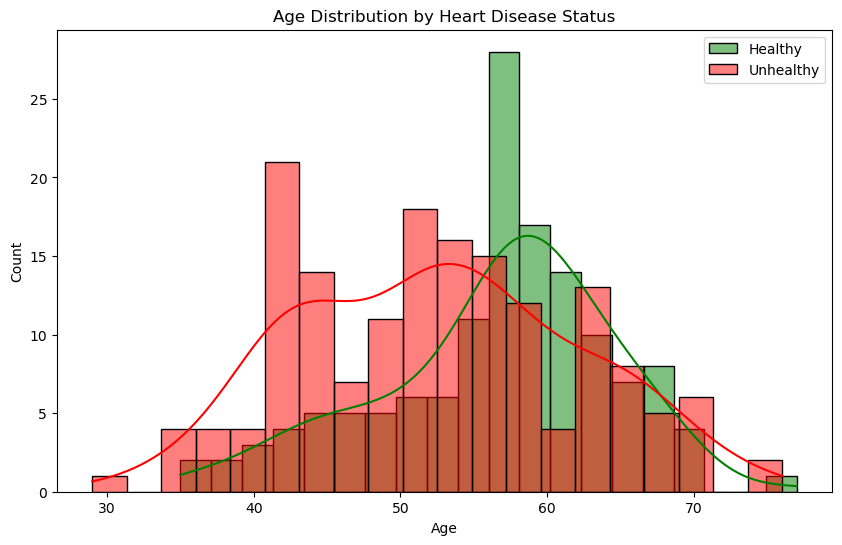

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data based on target variable
healthy = heart_data[heart_data['target'] == 0]
unhealthy = heart_data[heart_data['target'] == 1]

# Plot histograms for both groups
plt.figure(figsize=(10, 6))
sns.histplot(healthy['age'], bins=20, color='green', kde=True, label='Healthy')
sns.histplot(unhealthy['age'], bins=20, color='red', kde=True, label='Unhealthy')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Heart Disease Status')
plt.legend()
plt.show()